In [1]:
import numpy as np
import datetime as dt
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as scs
from matplotlib.dates import DateFormatter
import sys
sys.path.append('D:\\gitCCA\\CESdesign\\py')
import CESfunctions_dev as cf


In [11]:
## Load files into matrices
logfolder1 = 'E:\\DCtest\\'
#logfolder1 = '/home/mixtli/Avantes/logs30nov/'

DCln1 = cf.spectra_accumulator(logfolder1 + 'CEASline1DC.npy',2)
DCbg1 = cf.spectra_accumulator(logfolder1 + 'CEASbckg1DC.npy',2)
DCbg2 = cf.spectra_accumulator(logfolder1 + 'CEASbckg2DC.npy',2)

In [78]:
alpha1 = cf.extinction(np.average(DCln1[:,1:],axis=1), np.average(DCbg1[:,1:],axis=1), 0.9998, 70)
alpha2 = cf.extinction(np.average(DCln1[:,1:],axis=1), np.average(DCbg2[:,1:],axis=1), 0.9998, 70)

In [90]:
lower_wavelength=447 
upper_wavelength=458

refe1=cf.ref_interpolate("NO2.npy",DCln1) 
refe2=cf.ref_interpolate("CHOCHO.npy",DCln1)

minwave,maxwave=cf.segment_indices(DCln1,lower_wavelength,upper_wavelength) 
lines=np.copy(DCln1[minwave:maxwave,:]) 
bckg=np.copy(DCbg1[minwave:maxwave,:]) 
ref1=np.copy(refe1[minwave:maxwave,:]) 
ref2=np.copy(refe2[minwave:maxwave,:]) 
smooth_line=scs.savgol_filter(np.average(lines[:,1:],axis=1),51,8)
smooth_bckg=scs.savgol_filter(np.average(bckg[:,1:],axis=1),51,8)
alpha,fl,a,b,c,d = cf.fit_alg_1(smooth_line, smooth_bckg, 0.9998, 70,ref1,ref2,parameters=1)

First N1:  47.38040104100813  Second N1:  45.54897717825594
First N2:  -17.77481897607626  Second N2:  -0.47569720405147886


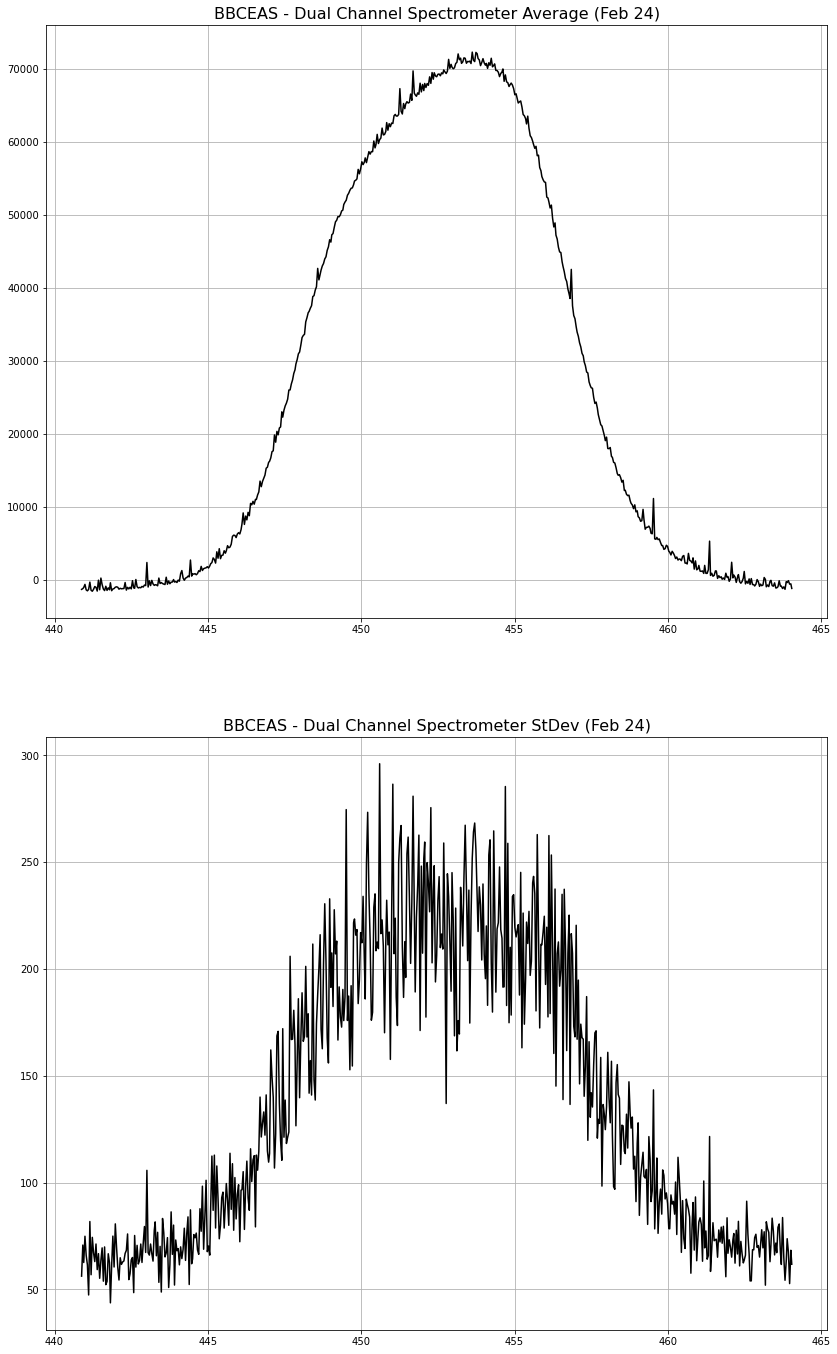

In [101]:
f = plt.figure(figsize=(14,24))
ax1 = f.add_subplot(211)

ax1.plot(DCbg1[1050:1650,0], np.average(DCbg1[1050:1650,1:],axis=1),'-k')
ax1.set_title("BBCEAS - Dual Channel Spectrometer Average (Feb 24)",size=16)
plt.grid()
ax2 = f.add_subplot(212)
ax2.plot(DCbg1[1050:1650,0], np.std(DCbg1[1050:1650,1:],axis=1),'-k')
ax2.set_title("BBCEAS - Dual Channel Spectrometer StDev (Feb 24)",size=16)
plt.grid()

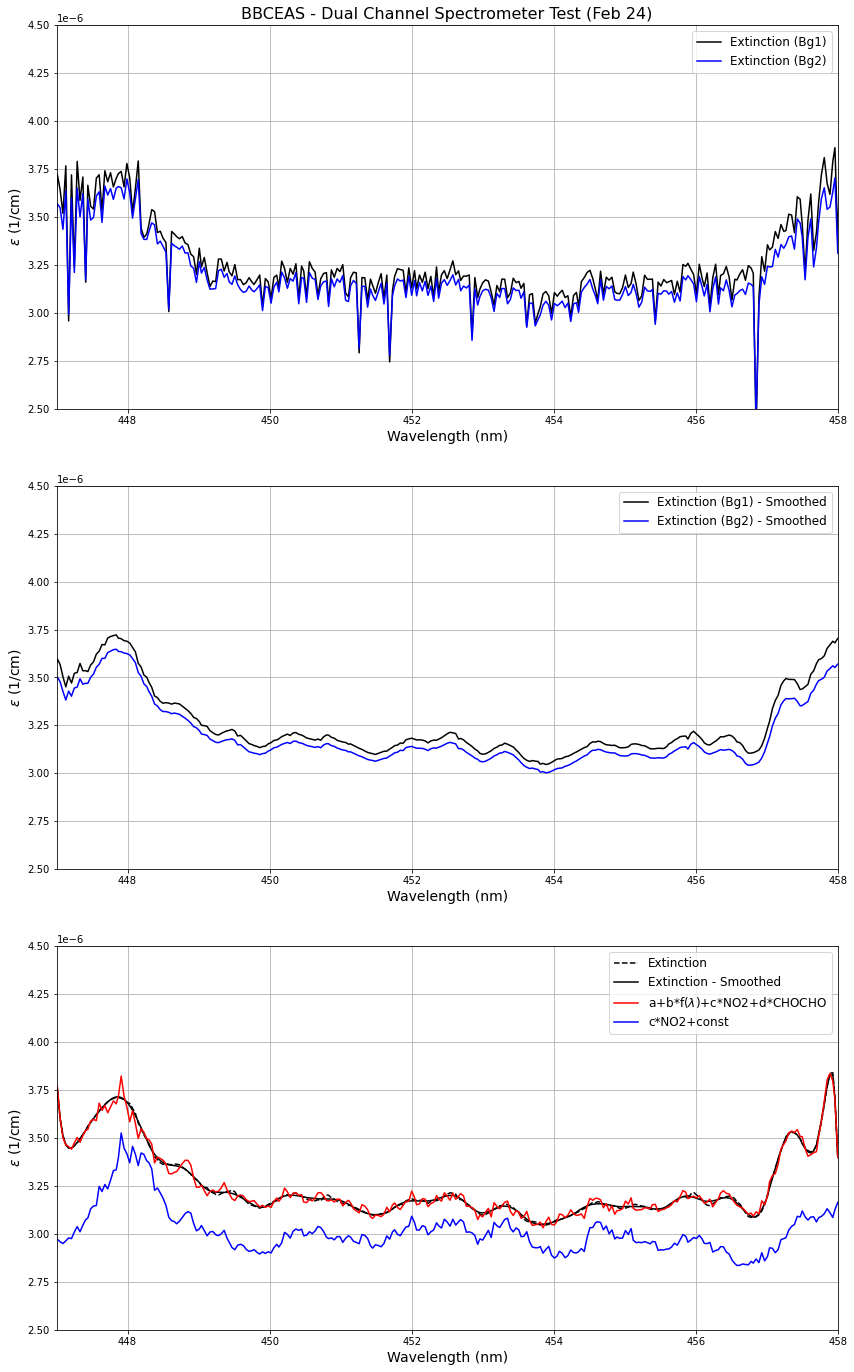

In [103]:
f = plt.figure(figsize=(14,24))
ax1 = f.add_subplot(311)

ax1.plot(DCln1[:,0], alpha1,'-k',label="Extinction (Bg1)")
ax1.plot(DCln1[:,0], alpha2,'-b',label="Extinction (Bg2)")

ax1.set_xlim(447,458)
ax1.set_ylim(2.5e-6,4.5e-6)
#ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS - Dual Channel Spectrometer Test (Feb 24)",size=16)
plt.grid()


ax2 = f.add_subplot(312)

ax2.plot(DCln1[:,0], scs.savgol_filter(alpha1,51,8),'-k',label="Extinction (Bg1) - Smoothed")
ax2.plot(DCln1[:,0], scs.savgol_filter(alpha2,51,8),'-b',label="Extinction (Bg2) - Smoothed")

ax2.set_xlim(447,458)
ax2.set_ylim(2.5e-6,4.5e-6)
#ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax2.legend(fontsize=12, loc='upper right')

ax2.set_xlabel('Wavelength (nm)',size=14)
ax2.set_ylabel('$\\epsilon$ (1/cm)',size=14)
plt.grid()

ax3 = f.add_subplot(313)
ax3.plot(lines[:,0], alpha,'--k',label="Extinction")
ax3.plot(lines[:,0], scs.savgol_filter(alpha[:,0],51,8),'-k',label="Extinction - Smoothed")
ax3.plot(lines[:,0], a+b*fl+c*ref1[:,1]+d*ref2[:,1],'-r',label="a+b*f($\\lambda$)+c*NO2+d*CHOCHO")
ax3.plot(lines[:,0], c*ref1[:,1]+2.5e-6,'-b',label="c*NO2+const")
ax3.set_xlim(447,458)
ax3.set_ylim(2.5e-6,4.5e-6)
#ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax3.legend(fontsize=12, loc='upper right')

ax3.set_xlabel('Wavelength (nm)',size=14)
ax3.set_ylabel('$\\epsilon$ (1/cm)',size=14)
plt.grid()

In [2]:
## Load files into matrices
logfolder1 = 'E:\\backtest\\'
#logfolder1 = '/home/mixtli/Avantes/logs30nov/'

DCbg = cf.spectra_accumulator(logfolder1 + 'CEASbckgDC.npy',1)
SCbg = cf.spectra_accumulator(logfolder1 + 'CEASbckgSC.npy',1)

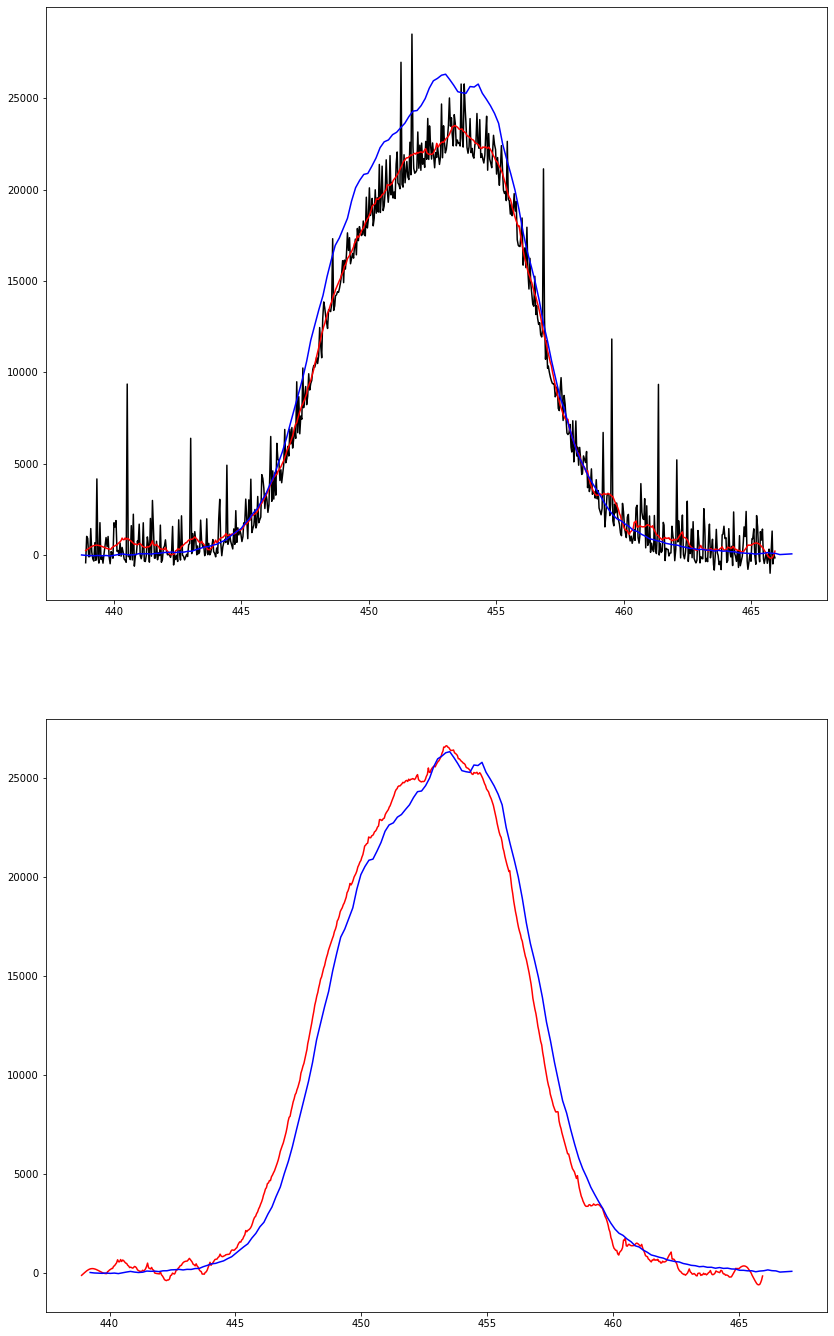

In [144]:
f = plt.figure(figsize=(14,24))
ax1 = f.add_subplot(211)
low1=1000
high1=1700
low2=240
high2=415


ax1.plot(DCbg[low1:high1,0], np.average(DCbg[low1:high1,1:],axis=1)+2800,'-k',label="Extinction (Bg1)")
ax1.plot(DCbg[low1:high1,0], scs.savgol_filter(np.average(DCbg[low1:high1,1:],axis=1)+2800,51,5),'-r',label="Extinction (Bg1)")
ax1.plot(SCbg[low2:high2,0], np.average(SCbg[low2:high2,1:],axis=1),'-b',label="Extinction (Bg2)")

ax2 = f.add_subplot(212)
ax2.plot(DCbg[low1:high1,0], scs.savgol_filter(np.average(DCbg[low1:high1,1:]*1.15,axis=1)+2800,51,5),'-r',label="Extinction (Bg1)")
ax2.plot(SCbg[low2:high2,0]+.5, np.average(SCbg[low2:high2,1:],axis=1),'-b',label="Extinction (Bg2)")

In [3]:
calSC = np.load("E:\\caltest\\CEASbckgSC.npy")

(440.0, 465.0)

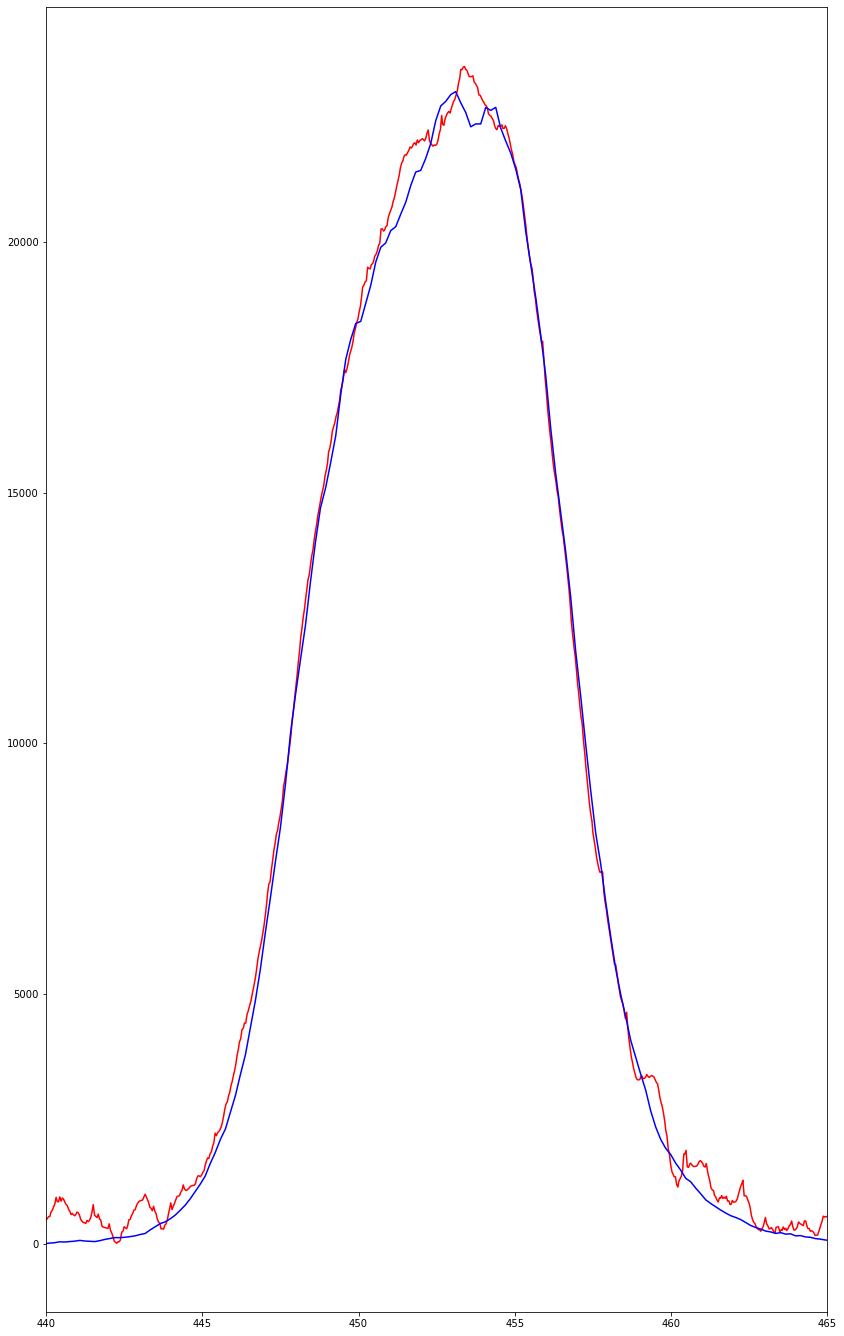

In [10]:
f = plt.figure(figsize=(14,24))
ax1 = f.add_subplot(111)
low1=1000
high1=1700

#ax1.plot(DCbg[low1:high1,0], np.average(DCbg[low1:high1,1:],axis=1)+2800,'-k',label="Extinction (Bg1)")
ax1.plot(DCbg[low1:high1,0], scs.savgol_filter(np.average(DCbg[low1:high1,1:],axis=1)+2800,51,5),'-r',label="Extinction (Bg1)")
ax1.plot(calSC[:,0]-.2,calSC[:,1]*.4,'-b',label="Extinction (Bg1)")
ax1.set_xlim(440,465)